In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

sef = {
    "triangulaire": np.array([(1, 0), (4, 1), (6, 0)]),
    "trapezoidal": np.array([(1, 0), (4, 1), (6, 1), (8, 0)]),
    "quelconque": np.array(
        [(1, 0), (4, 1), (6, 0.6), (7, 0.3), (9, 1), (10, 0.5), (15, 0)]
    ),
}


# Opération de base

## Question 1


In [2]:
def calcule_degre_appartenance(x: int, sef: np.ndarray):
    # x_values = sef[:, 0]
    return np.any(x == sef[:, 0])


## Question 2


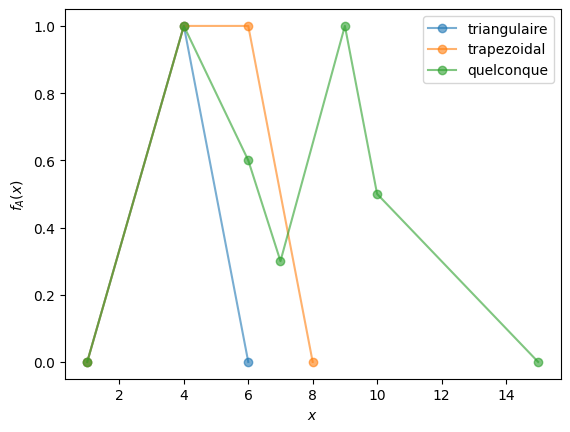

In [38]:
def plot_sef(sef: np.ndarray, name=None, alpha=1):
    x_values = sef[:, 0]
    y_values = sef[:, 1]

    plt.plot(x_values, y_values, marker="o", linestyle="-", label=name, alpha=alpha)
    plt.xlabel("$x$")
    plt.ylabel("$f_A(x)$")
    plt.legend()
    # plt.show()


def plot_sefs(sefs: dict, alpha=1, title=None):
    for name, values in sefs.items():
        plot_sef(values, name, alpha=alpha)
    if title:
        plt.gca().set_title(title)
    plt.show()


plot_sefs(sef, alpha=0.6)


# Opération ensemblistes


## Question 1


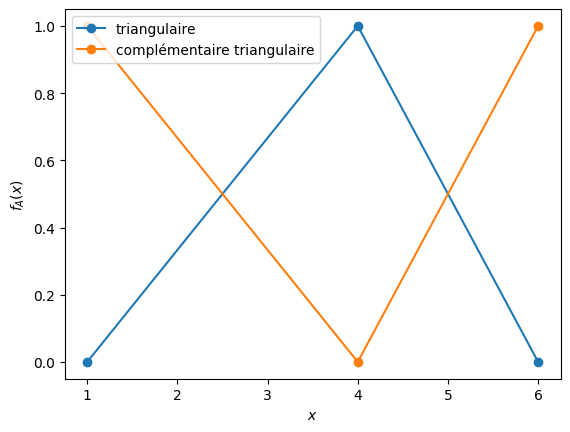

In [4]:
def complementary(sef):
    sef_copy = sef.copy()
    sef_copy[:, 1] = 1 - sef_copy[:, 1]
    return sef_copy


plot_sefs(
    {
        "triangulaire": sef["triangulaire"],
        "complémentaire triangulaire": complementary(sef["triangulaire"]),
    }
)


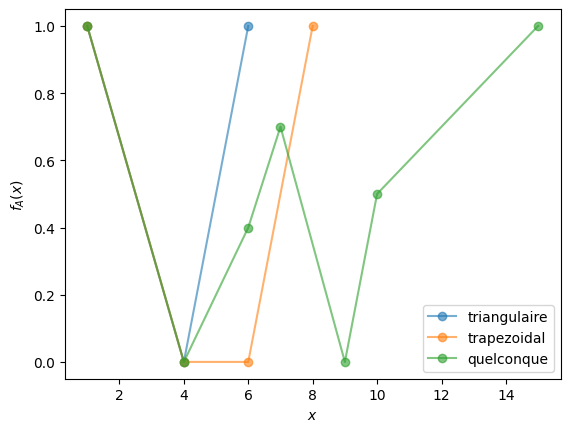

In [21]:
complementaries = {name: complementary(sef[name]) for name in sef.keys()}
plot_sefs(complementaries, alpha=0.6)


## Question 2


In [6]:
class TNorme:
    @staticmethod
    def probabiliste(x, y):
        return x * y

    @staticmethod
    def lukasiewiez(x, y):
        return np.maximum(x + y - 1, 0)

    @staticmethod
    def zadeh(x, y):
        return np.minimum(x, y)

    @staticmethod
    def hamacher(x, y):
        return np.where(x == y == 0, 0, (x * y) / (x + y - x * y))

    @staticmethod
    def drastique(x, y):
        if x == 1:
            return y
        elif y == 1:
            return x
        else:
            return 0


class TConorme:
    @staticmethod
    def probabiliste(x, y):
        return x + y - x * y

    @staticmethod
    def lukasiewiez(x, y):
        return np.minimum(x + y, 1)

    @staticmethod
    def zadeh(x, y):
        return np.maximum(x, y)

    @staticmethod
    def hamacher(x, y):
        return (x + y) / (1 + x * y)

    @staticmethod
    def drastique(x, y):
        if x == 0:
            return y
        elif y == 0:
            return x
        else:
            return 1


## Question 3


In [7]:
def intersection(a, b, t_norme, step=100):
    # création de l'axe x, plein de point entre le min et max de a et b
    x = list(a[:, 0]) + list(b[:, 0])
    x_min = np.min(x)
    x_max = np.max(x)
    x = np.linspace(x_min, x_max, step)
    
    f_a = np.interp(x, a[:, 0], a[:, 1])
    f_b = np.interp(x, b[:, 0], b[:, 1])
    f_inter = t_norme(f_a, f_b)
    return np.vstack((x, f_inter)).T


def union(a, b, t_conorme, step=100):
    x = list(a[:, 0]) + list(b[:, 0])
    x_min = np.min(x)
    x_max = np.max(x)
    x = np.linspace(x_min, x_max, step)
    f_a = np.interp(x, a[:, 0], a[:, 1])
    f_b = np.interp(x, b[:, 0], b[:, 1])
    f_inter = t_conorme(f_a, f_b)
    return np.vstack((x, f_inter)).T


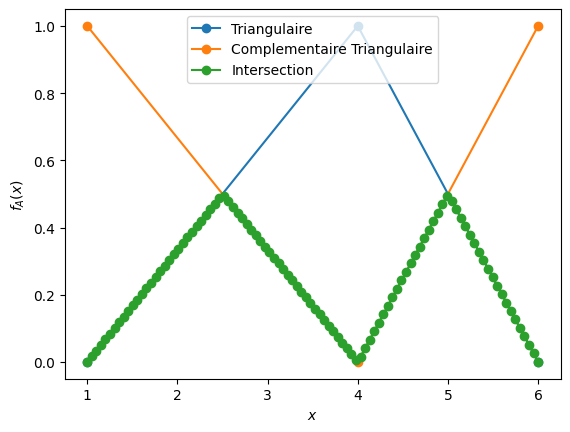

In [8]:
plot_sefs(
    {
        "Triangulaire": sef["triangulaire"],
        "Complementaire Triangulaire": complementaries["triangulaire"],
        "Intersection": intersection(
            sef["triangulaire"], complementaries["triangulaire"], TNorme.zadeh
        ),
    }
)


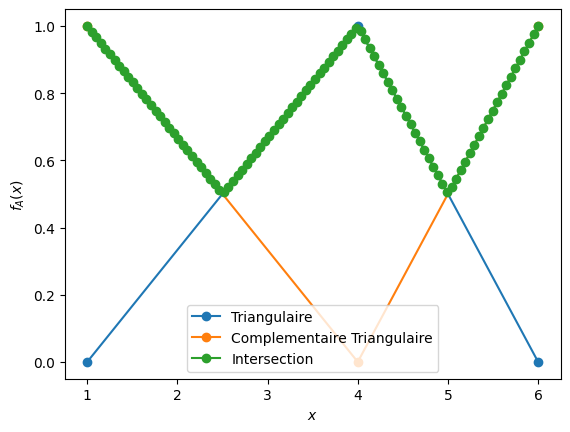

In [9]:
plot_sefs(
    {
        "Triangulaire": sef["triangulaire"],
        "Complementaire Triangulaire": complementaries["triangulaire"],
        "Intersection": union(
            sef["triangulaire"], complementaries["triangulaire"], TConorme.zadeh
        ),
    }
)


## Question 4


Classiquement $ A \cap A^C = \varnothing $ et $ A \cup A^C = \Omega $, ce n'est pas forcément le cas avec les ensembles flous. Cela dépend de la t-norme employé et de l'ensemble choisi. On note qu'il est possible de retrouver les résultats avec des ensembles classiques car les ensembles flous généralisent les ensembles classiques.


In [35]:
trapezoidal_classique = np.array([(4, 0), (4, 1), (6, 1), (6, 0)])
trapezoidal_flou = sef["trapezoidal"]
sec_trapezoidal = {
    "A": trapezoidal_classique,
    "Ac": complementary(trapezoidal_classique),
}  # sous ensemble classique
sef_trapezoidal = {
    "A": trapezoidal_flou,
    "Ac": complementary(trapezoidal_flou),
}


Expérimentons avec l'ensemble trapezoidal classique et flou


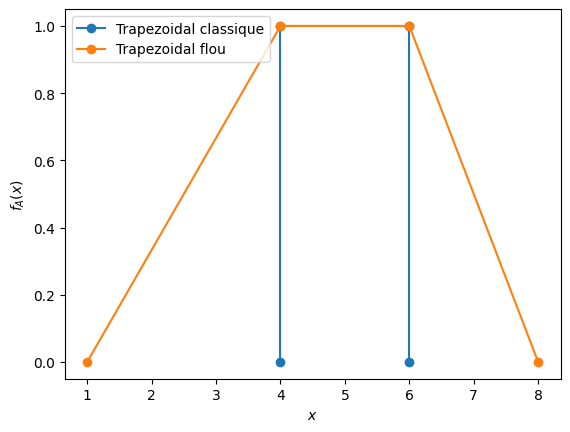

In [23]:
trapezoidal_sef = {  # sous ensemble classique
    "Trapezoidal classique": trapezoidal_classique,
    "Trapezoidal flou": sef["trapezoidal"],
}
plot_sefs(trapezoidal_sef)


### Vérification de la propriétés de non-contradiction


- Trapezoidal classique = $A$
- Trapezoidal classique complémentaire =$A^C$


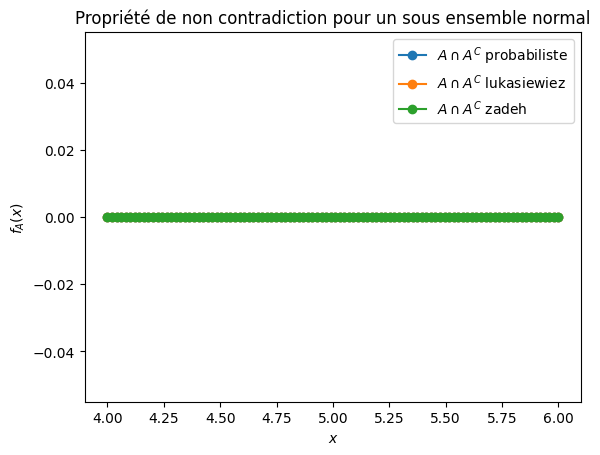

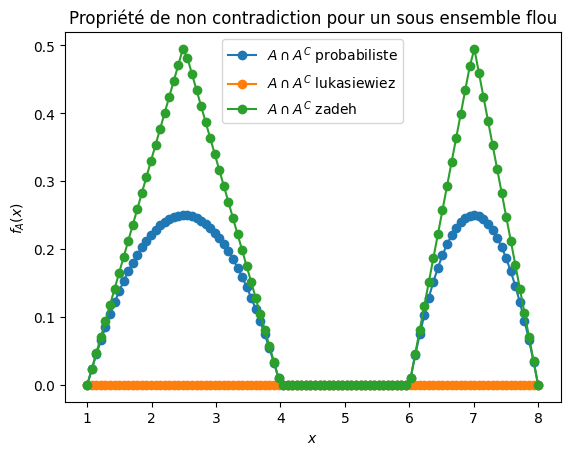

In [42]:
def plot_non_contradiction(d, *args, **kwds):
    """plot $A\cap A^C$ avec plusieur T-norme

    Parameters
    ----------
    d : dict
        Dictionnaire de forme {"A": ..., "Ac": ...}
    """
    plot_sefs(
        {
            "$A \cap A^C$ probabiliste": intersection(
                d["A"], d["Ac"], TNorme.probabiliste
            ),
            "$A \cap A^C$ lukasiewiez": intersection(
                d["A"], d["Ac"], TNorme.lukasiewiez
            ),
            "$A \cap A^C$ zadeh": intersection(d["A"], d["Ac"], TNorme.zadeh),
            # "$A \cap A^C$ hamacher": intersection(sec["A"], sec["Ac"], TNorme.hamacher),
            # "$A \cap A^C$ drastique": intersection(sec["A"], sec["Ac"], TNorme.drastique),
        },
        *args,
        **kwds
    )


plot_non_contradiction(
    sec_trapezoidal, title="Propriété de non contradiction pour un sous ensemble normal"
)
plot_non_contradiction(
    sef_trapezoidal, title="Propriété de non contradiction pour un sous ensemble flou"
)


La propriété de non contradiction reste vérifié avec un sous ensemble non flou sur ces trois t-normes pris en exemple.

En revanche pour un sous ensemble flou, la proprété n'est vérifié qu'en utilisant la t-norme de Zadeh


### Vérification de la propriétés de tiers exclu


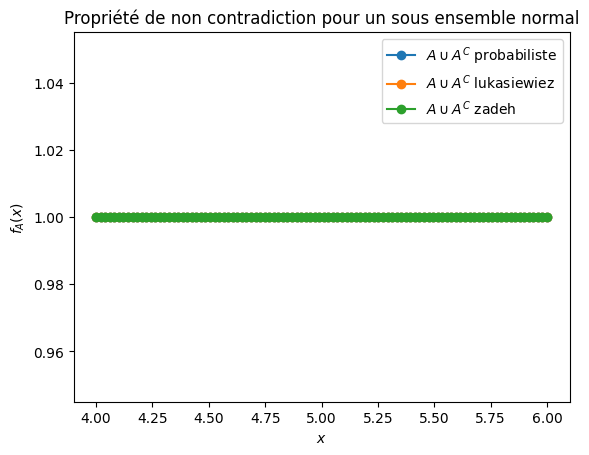

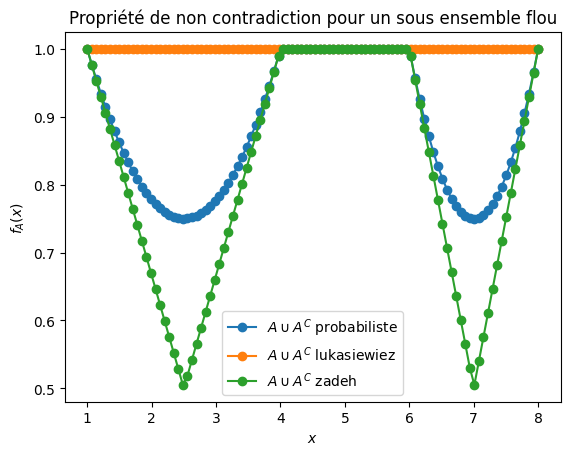

In [43]:
def plot_tier_exclu(d, *args, **kwds):
    """plot $A\cup A^C$ avec plusieur T-conorme

    Parameters
    ----------
    d : dict
        Dictionnaire de forme {"A": ..., "Ac": ...}
    """
    plot_sefs(
        {
            "$A \cup A^C$ probabiliste": union(d["A"], d["Ac"], TConorme.probabiliste),
            "$A \cup A^C$ lukasiewiez": union(d["A"], d["Ac"], TConorme.lukasiewiez),
            "$A \cup A^C$ zadeh": union(d["A"], d["Ac"], TConorme.zadeh),
            # "$A \cap A^C$ hamacher": intersection(sec["A"], sec["Ac"], TNorme.hamacher),
            # "$A \cap A^C$ drastique": intersection(sec["A"], sec["Ac"], TNorme.drastique),
        },
        *args,
        **kwds
    )


plot_tier_exclu(
    sec_trapezoidal, title="Propriété de non contradiction pour un sous ensemble normal"
)
plot_tier_exclu(
    sef_trapezoidal, title="Propriété de non contradiction pour un sous ensemble flou"
)


La propriété de tiers exclu reste vérifié avec un sous ensemble non flou sur ces trois t-normes pris en exemple.

En revanche pour un sous ensemble flou, la proprété n'est vérifié qu'en utilisant la t-norme de Lukasiewiez cette fois.


## Principe d'extension


## Question 1


In [125]:
class Phi:
    def __init__(self, expression, variable):
        self.expression = expression
        self.variable = variable

    def calcule(self, valeur):
        return self.expression.subs(self.variable, valeur)

    def antecedent(self, valeur):
        solutions = sp.solve(
            sp.Eq(self.expression, valeur),
            self.variable,
        )
        return solutions


x = sp.symbols("x", real=True)
phi = Phi(x**2, x)

# Calculer l'image de 3 par la fonction
display(phi.calcule(3))

# Trouver l'antécédent de 9 dans la fonction
display(phi.antecedent(9))

# Trouver l'antécédent de -1 dans la fonction
display(phi.antecedent(-1))

# Trouver l'antécédent de 9 dans la fonction
# display(phi.calcule(phi.antecedent(3)))


9

[-3, 3]

[]

phi -1 c'est l'ensemble des antécédents, quand on veut calculer, je veux ettendre mais je veux aussi savoir phi-1 on pour chaque y je veux une fonction antecedent qui pour un y donné me rend l'ensemble des données


## Question 2


On cherche l'image flou de A par $\phi$ donc pour moi on doit juste passer chaque point de notre ensemble $A$ dans $\phi$. Mais pourquoi on parle d'antécédents alors ? Parce que uniqument la définition je crois mdr (diapo 28)

$f_B(y) = $ l'image de notre sous ensemble flou

> quel est le prix TTC d’un livre qui vaut autour de 10 euros HT ?
> Dans cette exemple $\phi(x) = 1.2x$.


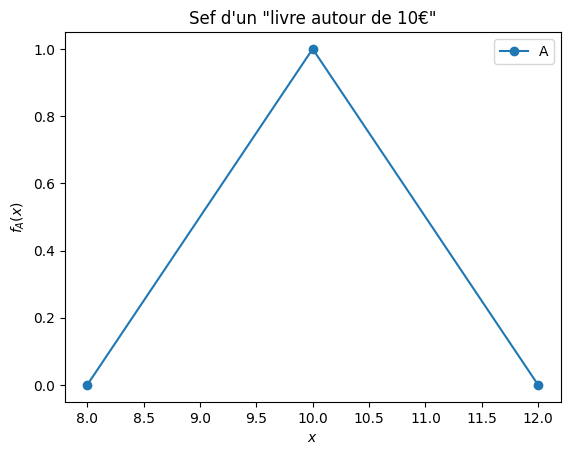

In [131]:
A = np.array([(8, 0), (10, 1), (12, 0)])
plot_sefs({"A":A}, title='Sef d\'un "livre autour de 10€"')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


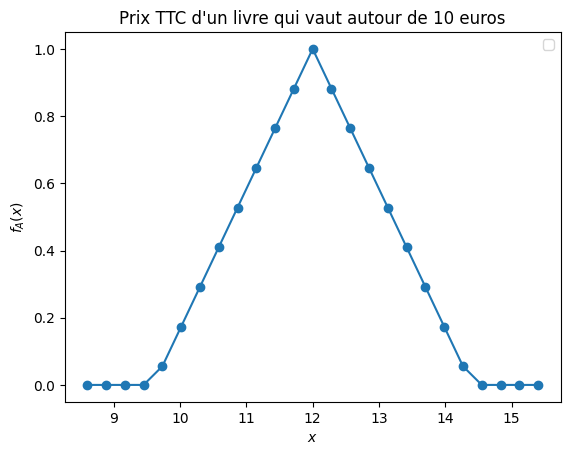

In [147]:
def extension(A, phi, num=25):
    f_b = []
    f_a = lambda x: np.interp(x, A[:, 0], A[:, 1])
    
    # obligé de bloucler à un moment, c'est pas compatible avec les arrays
    # Il faut convertir en float sinon numpy n'arrive pas à identifier le dtype dans le linspace
    y = [float(phi.calcule(A[i,0])) for i in range(len(A))] 
    y_min = min(y) - 1 
    y_max = max(y) + 1
    y = np.linspace(y_min, y_max, num)
    for y_i in y : # je ne sais pas trop comment limiter y 
        x_i = phi.antecedent(y_i)
        if len(x_i) == 0:
            f_b.append((y_i, 0))
        else:
            sup = f_a(x_i).max()
            f_b.append((y_i, sup))
    return np.array(f_b)

x = sp.symbols("x", real=True, strict=False)
phi = Phi(1.2*x, x)
f_B = extension(A, phi)
plot_sefs({"":f_B}, title="Prix TTC d'un livre qui vaut autour de 10 euros")

# Opérations logiques
